# Topic modeling of the Annual Messages to Congress on the State of the Union.

## Data

All the speeches transcriptions was taken from the [American Presidency Project](https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/annual-messages-congress-the-state-the-union). 

Corpus is consists of annualy messages to congress from the first one in 1790 except one year - 1933, when speech was not deliverred neither as a written message, nor as a speech, and additional 6 speeches of Richard Nixon in 1973.

The scrapping algorythm you can find at *data* folder

In [1]:
import pickle
data = pickle.load(open('data/data.pkl', 'rb'))

In [2]:
data

,speech,date
0,Fellow-Citizens of the Senate and House of Rep...,1790-01-08
1,Fellow-Citizens of the Senate and House of Rep...,1790-12-08
2,Fellow-Citizens of the Senate and House of Rep...,1791-10-25
3,Fellow-Citizens of the Senate and House of Rep...,1792-11-06
4,Fellow-Citizens of the Senate and House of Rep...,1793-12-03
...,...,...
242,"Thank you very much. Mr. Speaker, Mr. Vice Pre...",2017-02-28
243,"The President. Mr. Speaker, Mr. Vice President...",2018-01-30
244,"The President. Madam Speaker, Mr. Vice Preside...",2019-02-05
245,The President. Thank you very much. Thank you....,2020-02-04


In [9]:
texts = data.speech.values

In [18]:
len(texts)

247

In [84]:
sentences = []
for i in texts:
    sentences += i.split('. ')

In [86]:
len(sentences)

70430

## Topic modeling technique

In this notebook for topic modeling will be used BERTopic. This is a topic modeling technique that leverages transformers and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

Full description of the technic could be found at [GitHub](https://github.com/MaartenGr/BERTopic)

In [87]:
# %%captur
# !pip install bertopic

*NOTE: After installing bertopic runtime reset is needed*

In [88]:
from bertopic import BERTopic

In [89]:
sentence_transformer = 'all-mpnet-base-v2'
model = BERTopic(language="english", 
                calculate_probabilities=True, 
                verbose=True, 
                embedding_model=sentence_transformer,
                top_n_words=20,
                n_gram_range=(1, 3))
topics, probs = model.fit_transform(sentences)

Batches: 100%|██████████| 2201/2201 [54:14<00:00,  1.48s/it] 
2021-12-21 02:27:38,134 - BERTopic - Transformed documents to Embeddings
2021-12-21 02:28:38,092 - BERTopic - Reduced dimensionality with UMAP


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2021-12-21 02:57:29,038 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [94]:
pickle.dump(model, open('BERTopic_model_speeches.pkl', 'wb'))

/home/mikkkael/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [91]:
freq = model.get_topic_info()
freq

,Topic,Count,Name
0,-1,33737,-1_the_of_to_and
1,0,1609,0_we_do_let_but
2,1,1181,1_education_schools_school_children
3,2,994,2_indian_indians_tribes_the indians
4,3,984,3_farm_agriculture_agricultural_farmers
...,...,...,...
518,529,10,529_that we relieve_we relieve_duty_their duty...
516,527,10,527_realism_reason and_to remove the_the call
515,526,10,526_of property was_damage_property_property was
514,530,10,530_judges_salaries_salaries of the_the salari...


In [92]:
model.get_topic(31)

[('railroads', 0.012072028562003075),
 ('railroad', 0.00911911060269972),
 ('interstate', 0.007704605600901679),
 ('the railroads', 0.007268461329359274),
 ('railway', 0.007014004680801876),
 ('railways', 0.00584573131940656),
 ('interstate commerce', 0.0056788416774564785),
 ('the interstate', 0.004747955104943944),
 ('interstate commerce commission', 0.004690655760056495),
 ('commerce commission', 0.004690655760056495),
 ('the interstate commerce', 0.004517309708701085),
 ('the railways', 0.004434601021471044),
 ('commerce', 0.0035886580863750215),
 ('commission', 0.0034617805022789513),
 ('the railroad', 0.0032405997844161824),
 ('the railway', 0.0029957916953548282),
 ('of railroad', 0.0028637041498396974),
 ('employees', 0.002853382704172018),
 ('of the interstate', 0.002849412539003186),
 ('public', 0.002543859687277821)]

In [93]:
model.visualize_hierarchy()

### Importing Data

In [1]:
import pandas as pd
data = pd.read_csv('abcnews-date-text.csv', error_bad_lines = False)
data_text = data[['headline_text']]
data_text['index'] = data_text.index
documents = data_text

### Looking to a DataFrame

In [2]:
documents.head()

,headline_text,index
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,4


In [3]:
documents.shape

(1103663, 2)

### Loading gensim and nltk libraries

Gensim - is billed as a Natural Language Processing package that does ‘Topic Modeling for Humans’. But it is practically much more than that. It is a leading and a state-of-the-art package for processing texts, working with word vector models (such as Word2Vec, FastText etc) and for building topic models.
https://www.machinelearningplus.com/nlp/gensim-tutorial/#top

nltk - Natural Language Toolkit
http://www.nltk.org/

In [4]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Михаил\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Functions for lemmatization and stemming

In [5]:
stemmer = nltk.stem.snowball.EnglishStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos = 'v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
def lemmatize(text):
    a= []
    for token in gensim.utils.simple_preprocess(text):
        a.append(WordNetLemmatizer().lemmatize(token, pos = 'v'))
    return a

### Selecting a document to preview after preprocessing

TODO  = upgrade stemmers and lemmatizers to correct result from 'residents', 'heavy' etc. 

In [6]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print ('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print (words)
print ('lemmatized document:')
print (lemmatize(doc_sample))
print ('tokenized and lemmatized document: ')
print (preprocess(doc_sample))

original document: 
['rain', 'helps', 'dampen', 'bushfires']
lemmatized document:
['rain', 'help', 'dampen', 'bushfires']
tokenized and lemmatized document: 
['rain', 'help', 'dampen', 'bushfir']


In [7]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs.head(10)

0            [decid, communiti, broadcast, licenc]
1                               [wit, awar, defam]
2           [call, infrastructur, protect, summit]
3                      [staff, aust, strike, rise]
4             [strike, affect, australian, travel]
5               [ambiti, olsson, win, tripl, jump]
6           [antic, delight, record, break, barca]
7    [aussi, qualifi, stosur, wast, memphi, match]
8            [aust, address, secur, council, iraq]
9                         [australia, lock, timet]
Name: headline_text, dtype: object

### Creating a bag of words

In [8]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [9]:
count = 0
for k, v in dictionary.iteritems():
    print (k, v)
    count +=1
    if count >10:
        break

0 broadcast
1 communiti
2 decid
3 licenc
4 awar
5 defam
6 wit
7 call
8 infrastructur
9 protect
10 summit


### Filtering only the words that apeears in
- less then 15 documents OR
- more than 0.5 documents (fraction of totalcorpus size, not absolute value)
- after the aboce two steps, keep only the first 100 000 most frequent tokens

In [10]:
dictionary.filter_extremes(no_below = 15, no_above = 0.5, keep_n = 100000)

### Creating dictionary for each doc in corpus

In [11]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [12]:
bow_corpus[4310]

[(161, 1), (239, 1), (291, 1), (588, 1), (836, 1), (3549, 1), (3550, 1)]

In [14]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print ("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 76 ("bushfir") appears 1 time.
Word 112 ("help") appears 1 time.
Word 483 ("rain") appears 1 time.
Word 4014 ("dampen") appears 1 time.


### TF-IDF - term frequency-inverse document frequency
https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [15]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [16]:
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5892908867507543),
 (1, 0.38929654337861147),
 (2, 0.4964985175717023),
 (3, 0.5046520327464028)]


### Running LDA using bag of words

In [17]:
lda_model2 = gensim.models.LdaMulticore(bow_corpus, num_topics = 10, id2word = dictionary, passes = 2, workers = 2)

In [19]:
#lda_model3= gensim.models.LdaMulticore(bow_corpus, num_topics = 10, id2word = dictionary, passes = 2, workers = 3)

In [207]:
#lda_model4 = gensim.models.LdaMulticore(bow_corpus, num_topics = 10, id2word = dictionary, passes = 2, workers = 4)

In [209]:
#lda_model5 = gensim.models.LdaMulticore(bow_corpus, num_topics = 10, id2word = dictionary, passes = 2, workers = 5)

### Saving and loading models for further analisys

In [225]:
#lda_model2.save('lda2.model')
#lda_model3.save('lda3.model')
#lda_model4.save('lda4.model')
#lda_model5.save('lda5.model')

In [231]:
lda_model2 = models.LdaModel.load('lda2.model')
lda_model3 = models.LdaModel.load('lda3.model')
lda_model4 = models.LdaModel.load('lda4.model')
lda_model5 = models.LdaModel.load('lda5.model')

## Visualize WordClouds by topics

In [210]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

%matplotlib inline

In [211]:
stop_words = gensim.parsing.preprocessing.STOPWORDS


In [216]:
topics2 = lda_model2.show_topics(formatted = False)
topics3 = lda_model3.show_topics(formatted = False)
topics4 = lda_model4.show_topics(formatted = False)
topics5 = lda_model5.show_topics(formatted = False)

def plot_WordCloud(topic):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    cloud = WordCloud(stopwords = stop_words,
                      background_color ='black',
                      width = 1200,
                      height = 900,
                      max_words = 25,
                      colormap = 'tab10',
                      color_func = lambda *args, **kwargs: cols[i],
                      prefer_horizontal = 0
                    )
    
    fig, axes = plt.subplots(5, 2, figsize=(30,50), sharex = True, sharey = True)
    
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topic[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=64))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

In [217]:
from collections import Counter
Flat_Data = [w for w_list in processed_docs for w in w_list]
counter = Counter(Flat_Data)
def plot_WordCounts(topics):
    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i, weight, counter[word]])

    df = pd.DataFrame(out, columns = ['word', 'topic_id', 'importance', 'word_count'])

    fig, axes = plt.subplots(5, 2, figsize=(30,60), sharey=True, dpi=40)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    for i, ax in enumerate(axes.flatten()):
        ax.set_facecolor('black')
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i], fontsize = 40)
        ax_twin.set_ylim(0, 0.05)
        ax.set_ylim(0, 50000)
        ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=50)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], color=cols[i], rotation=30, horizontalalignment= 'right', fontsize = 40)
        ax.legend(loc='upper left', fontsize = 30, facecolor = 'white', edgecolor = 'black')
        ax_twin.legend(loc='upper right', fontsize = 30, facecolor = 'white',edgecolor = 'black')
        ax.tick_params(axis='y', colors='white', labelsize = 30)
        
      
    fig.set_facecolor('black')    
    fig.tight_layout(w_pad=2)    
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=80, y=1.05, color = 'white')    
    plt.show()

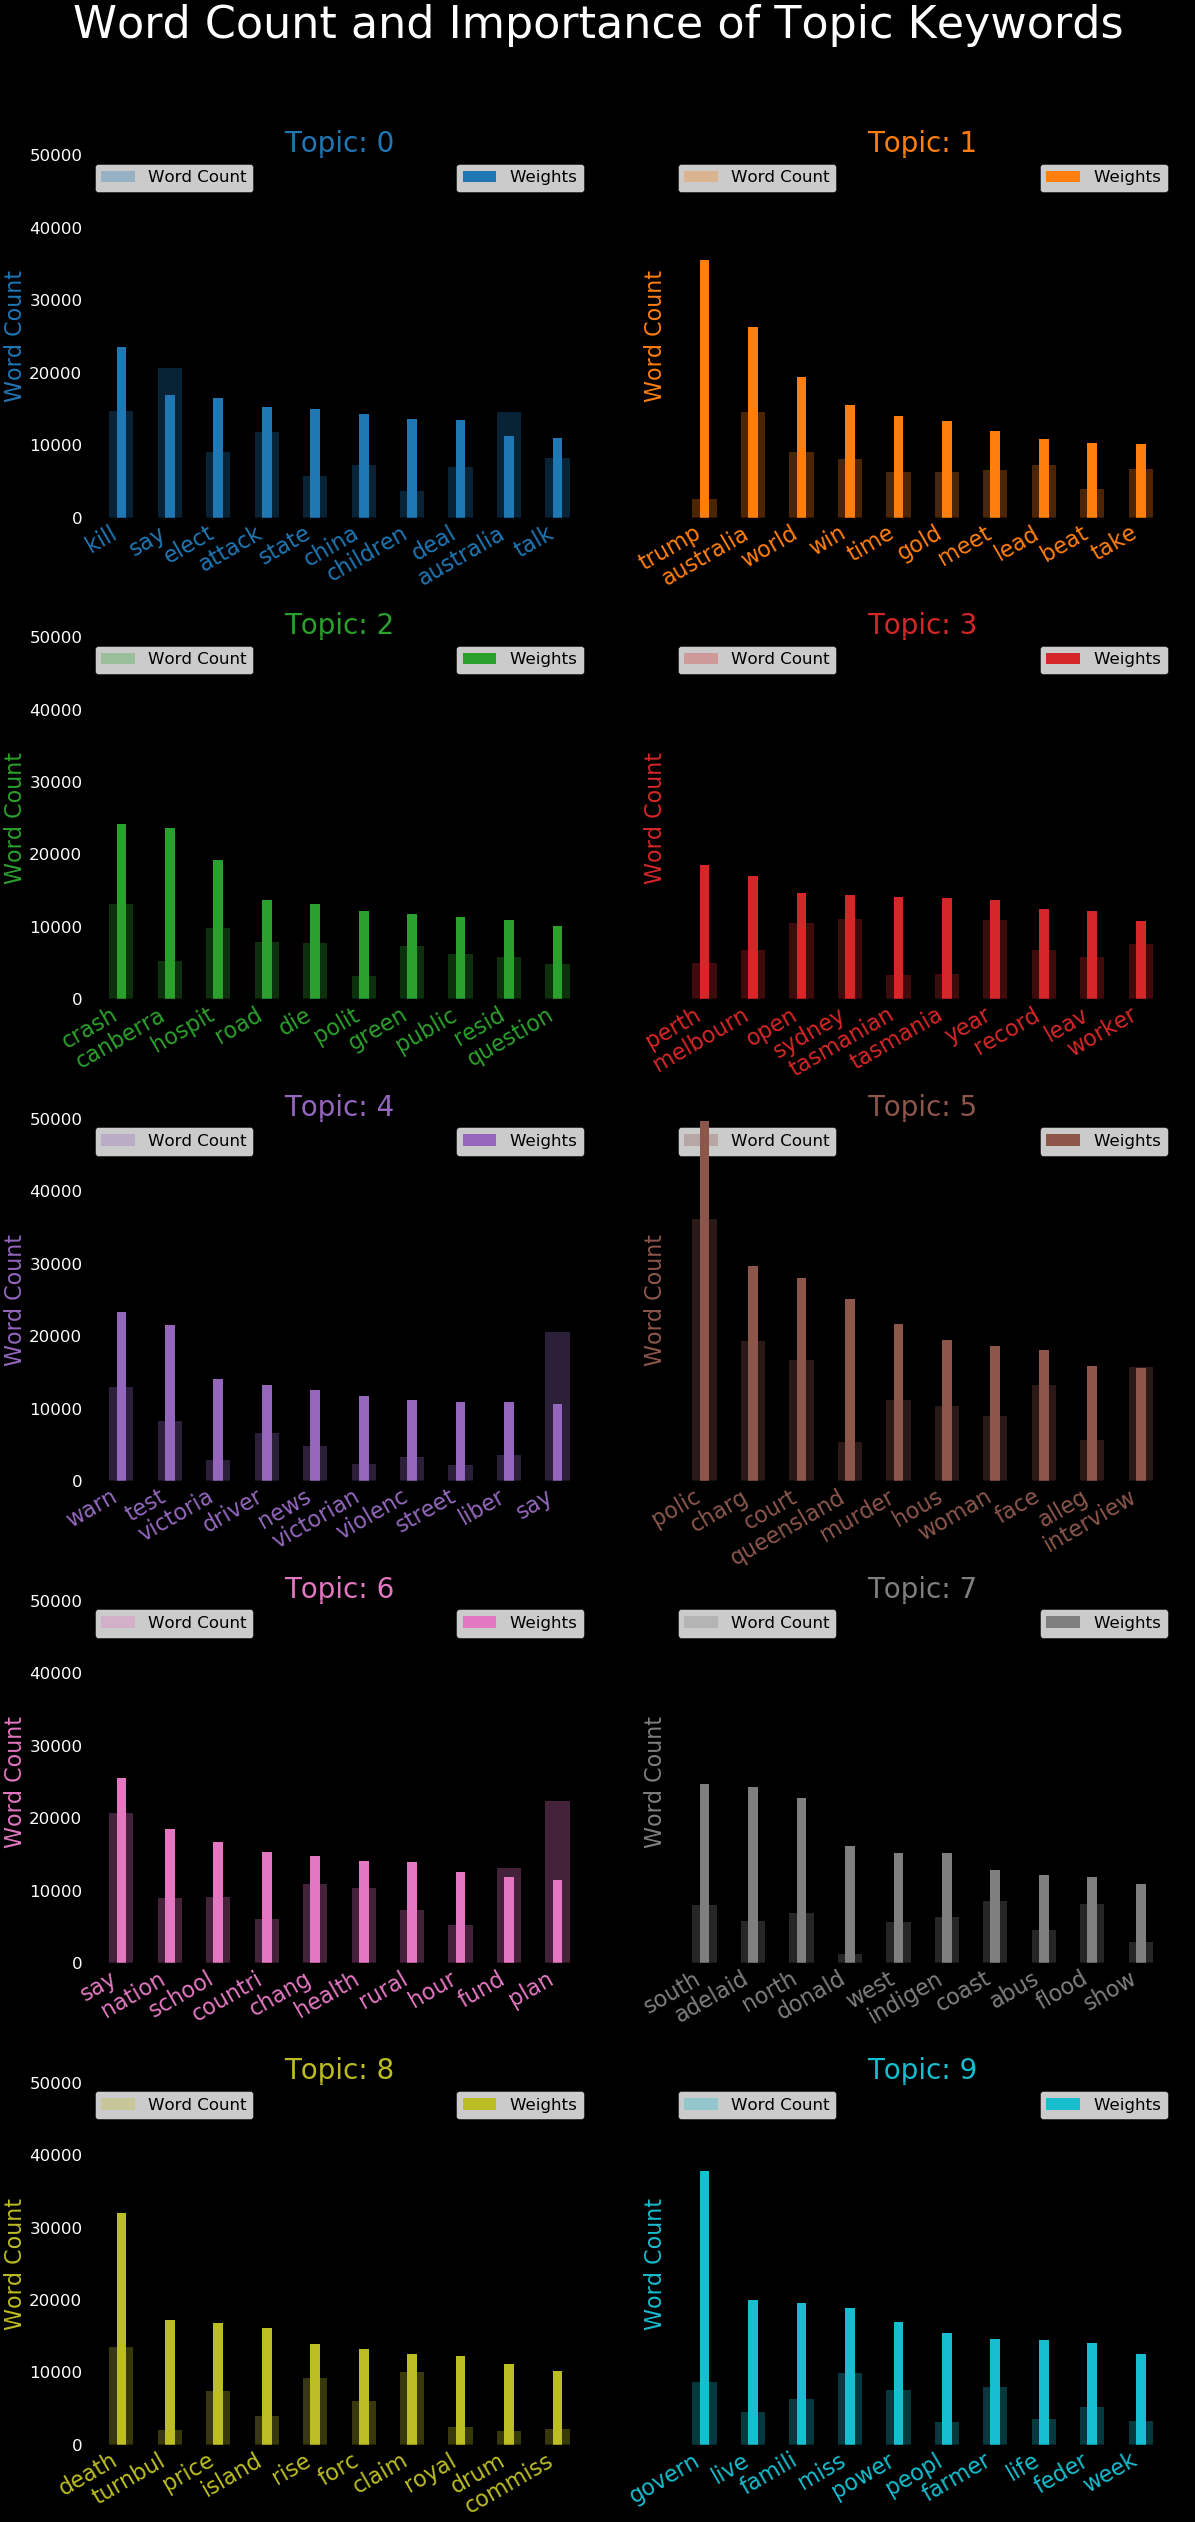

In [232]:
plot_WordCounts(lda222.show_topics(formatted = False))

In [221]:
for index, score in sorted(lda_model4[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model4.print_topic(index, 10)))


Score: 0.56716388463974	 
Topic: 0.022*"countri" + 0.019*"hour" + 0.018*"rural" + 0.016*"melbourn" + 0.015*"farmer" + 0.014*"servic" + 0.013*"busi" + 0.012*"communiti" + 0.012*"meet" + 0.011*"children"

Score: 0.27274397015571594	 
Topic: 0.035*"australia" + 0.021*"world" + 0.018*"test" + 0.017*"win" + 0.011*"beat" + 0.010*"turnbul" + 0.010*"time" + 0.009*"leagu" + 0.009*"race" + 0.009*"second"

Score: 0.020020021125674248	 
Topic: 0.019*"south" + 0.017*"coast" + 0.016*"north" + 0.015*"market" + 0.014*"china" + 0.014*"live" + 0.013*"australia" + 0.012*"west" + 0.012*"power" + 0.012*"gold"

Score: 0.020011361688375473	 
Topic: 0.028*"report" + 0.021*"school" + 0.012*"rise" + 0.011*"student" + 0.010*"game" + 0.010*"road" + 0.010*"royal" + 0.010*"lead" + 0.009*"build" + 0.009*"action"

Score: 0.02001054212450981	 
Topic: 0.029*"govern" + 0.027*"plan" + 0.023*"council" + 0.016*"water" + 0.015*"chang" + 0.013*"concern" + 0.012*"farm" + 0.011*"green" + 0.009*"say" + 0.009*"polit"

Score: 0.

### Testing model on unseen document

In [223]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model4[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model4.print_topic(index, 5)))

Score: 0.44231390953063965	 Topic: 0.027*"elect" + 0.026*"queensland" + 0.019*"health" + 0.014*"say" + 0.010*"donald"
Score: 0.2577252686023712	 Topic: 0.028*"report" + 0.021*"school" + 0.012*"rise" + 0.011*"student" + 0.010*"game"
Score: 0.18321764469146729	 Topic: 0.047*"polic" + 0.028*"charg" + 0.025*"court" + 0.019*"murder" + 0.017*"death"
Score: 0.01667976751923561	 Topic: 0.022*"countri" + 0.019*"hour" + 0.018*"rural" + 0.016*"melbourn" + 0.015*"farmer"
Score: 0.01667896844446659	 Topic: 0.019*"south" + 0.017*"coast" + 0.016*"north" + 0.015*"market" + 0.014*"china"
Score: 0.01667860895395279	 Topic: 0.025*"australian" + 0.018*"warn" + 0.015*"kill" + 0.015*"break" + 0.014*"open"
Score: 0.01667669601738453	 Topic: 0.027*"nation" + 0.026*"trump" + 0.021*"miss" + 0.018*"claim" + 0.015*"news"
Score: 0.016676638275384903	 Topic: 0.034*"interview" + 0.021*"hospit" + 0.018*"dead" + 0.011*"john" + 0.011*"premier"
Score: 0.01667637936770916	 Topic: 0.035*"australia" + 0.021*"world" + 0.018